<a href="https://colab.research.google.com/github/erenonaran/deeplearning/blob/main/Pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn 
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"

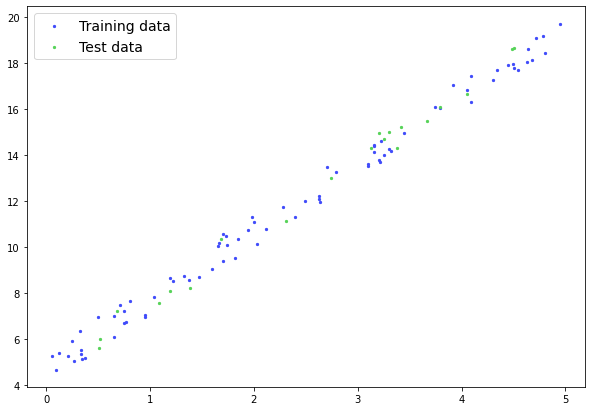

In [ ]:
#Data Preparing
rand1 = torch.rand(size=(100,1))
rand2 = torch.rand(size=(100,1))
x = 5*rand1
y = 4.0 + 3*x + 1.5*rand2

#Data splitting 
test_split = int(0.2 * x.shape[0])
x_test = x[:test_split]
y_test = y[:test_split]
x_train = x[test_split:]
y_train = y[test_split:]

#Plot the data
def plot_data(x_train=x_train, 
              x_test=x_test, 
              y_train=y_train,
              y_test=y_test,
              preds=None):
  
  plt.figure(figsize=(10, 7))
  
  plt.scatter(x_train,y_train,c="#404BFA",s=5,label="Training data")
  plt.scatter(x_test,y_test,c="#57D359",s=5,label="Test data")
  if preds != None:
    plt.scatter(x_test,preds,c="#EF1C1C",s=5,label="Predictions")
  plt.legend(prop={"size": 14})

plot_data()

In [ ]:
#Building Model
class LinearModel(nn.Module):

  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear(x)

#Setting the seed manually
torch.manual_seed(42)
model_0 = LinearModel()
print(model_0.state_dict())
print(next(model_0.parameters()).device)

OrderedDict([('linear.weight', tensor([[0.7645]])), ('linear.bias', tensor([0.8300]))])
cpu


In [ ]:
model_0.to(device)
print(model_0.state_dict())
print(next(model_0.parameters()).device)

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')), ('linear.bias', tensor([0.8300], device='cuda:0'))])
cuda:0


In [ ]:
#Setting up loss function
loss_func = nn.L1Loss()

#Setting up optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

#Putting data into target device 
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

#Training loop
torch.manual_seed(42)

epochs = 200

for epochs in range(epochs):
  model_0.train()
  preds = model_0(x_train)
  loss = loss_func(preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing loop 
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(x_test)
    test_loss = loss_func(test_pred,y_test)

  if epochs % 20 == 0:
    print(f"Epoch: {epochs}, State Dictionary: {model_0.state_dict()}, Loss: {loss}, Test loss: {test_loss}")


  

Epoch: 0, State Dictionary: OrderedDict([('linear.weight', tensor([[3.0440]], device='cuda:0')), ('linear.bias', tensor([4.4515], device='cuda:0'))]), Loss: 0.38211867213249207, Test loss: 0.3561145067214966
Epoch: 20, State Dictionary: OrderedDict([('linear.weight', tensor([[3.0405]], device='cuda:0')), ('linear.bias', tensor([4.4610], device='cuda:0'))]), Loss: 0.3816133141517639, Test loss: 0.3579537570476532
Epoch: 40, State Dictionary: OrderedDict([('linear.weight', tensor([[3.0379]], device='cuda:0')), ('linear.bias', tensor([4.4708], device='cuda:0'))]), Loss: 0.38110288977622986, Test loss: 0.35907524824142456
Epoch: 60, State Dictionary: OrderedDict([('linear.weight', tensor([[3.0353]], device='cuda:0')), ('linear.bias', tensor([4.4805], device='cuda:0'))]), Loss: 0.3805925250053406, Test loss: 0.36019665002822876
Epoch: 80, State Dictionary: OrderedDict([('linear.weight', tensor([[3.0327]], device='cuda:0')), ('linear.bias', tensor([4.4903], device='cuda:0'))]), Loss: 0.38008

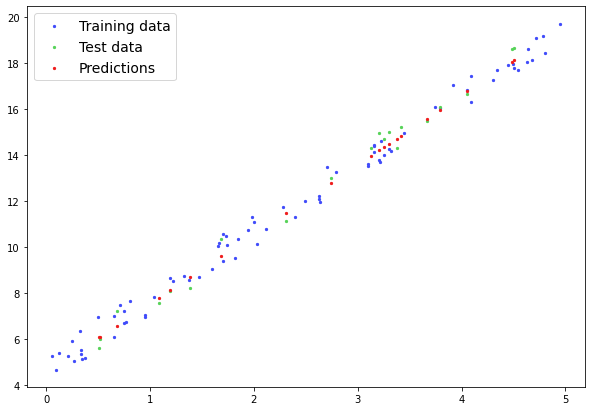

In [ ]:
test_pred = test_pred.cpu()
plot_data(preds=test_pred)

In [ ]:
#Saving state dictionary of trained model

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)


Saving model to models/01_pytorch_workflow_model.pth


In [ ]:
#Loading state dictionary 

pre_trained_model = LinearModel()
pre_trained_model.load_state_dict(torch.load(MODEL_SAVE_PATH))
pre_trained_model.to(device)

print(next(pre_trained_model.parameters()).device)
print(model_0.state_dict())
print(pre_trained_model.state_dict())

cuda:0
OrderedDict([('linear.weight', tensor([[3.0142]], device='cuda:0')), ('linear.bias', tensor([4.5345], device='cuda:0'))])
OrderedDict([('linear.weight', tensor([[3.0142]], device='cuda:0')), ('linear.bias', tensor([4.5345], device='cuda:0'))])


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


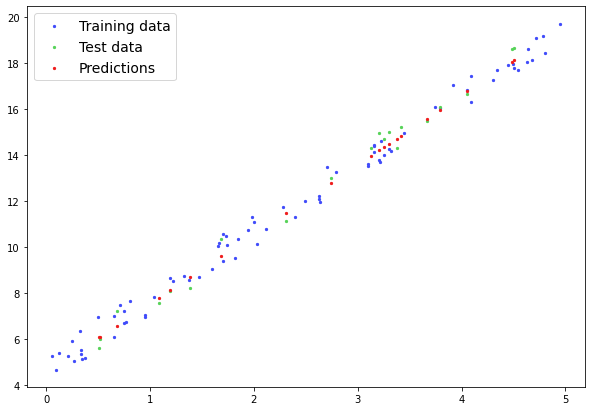

In [ ]:
pre_trained_model.eval()
with torch.inference_mode():
  new_preds = pre_trained_model(x_test)

new_preds = new_preds.cpu()
print(new_preds == test_pred)
plot_data(preds=new_preds)